In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0201/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 460 ms, sys: 24.8 ms, total: 485 ms
Wall time: 487 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.0,-0.004541,0.0,-0.010164,0.0,-0.019840,0.0,-0.005006,0.0,-0.037033,...,0.000000e+00,-0.004786,0.0,-0.000242,0.0,0.000467,0.0,0.005577,0.0,-0.003708
1,0.0,0.004050,0.0,0.004103,0.0,-0.011531,0.0,-0.004805,0.0,-0.019896,...,2.317985e-04,-0.002945,0.0,0.001218,0.0,-0.001032,0.0,-0.003845,0.0,-0.000866
2,0.0,-0.001229,0.0,-0.000202,0.0,-0.015666,0.0,-0.003777,0.0,-0.009648,...,1.185987e-09,-0.006368,0.0,-0.002138,0.0,-0.004796,0.0,-0.015330,0.0,-0.002189
3,0.0,0.005885,0.0,0.011435,0.0,-0.002345,0.0,-0.003185,0.0,-0.014493,...,0.000000e+00,-0.002975,0.0,0.005170,0.0,-0.000173,0.0,-0.012279,0.0,0.002978
4,0.0,0.001654,0.0,0.000605,0.0,-0.003648,0.0,-0.002957,0.0,-0.006354,...,0.000000e+00,-0.001731,0.0,0.002636,0.0,0.003816,0.0,-0.004361,0.0,0.006272


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834402e-07,0.000004,0.0,0.0,...,0.0,0.0,0.000002,0.387255,0.026875,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000865,0.294906,2.317985e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000054,0.000619,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000567,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.0,0.0,0.0,0.0,0.0,0.0,7.834405e-07,0.000004,0.0,0.0,...,0.0,0.0,2.478146e-06,0.472933,0.027239,0.000000e+00,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000866,0.343000,2.318253e-04,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000054,0.000620,1.185987e-09,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,5.671876e-04,0.000107,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,2.057258e-07,0.001316,0.000011,0.000000e+00,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    45.000217
1    45.000040
2    47.000001
3    37.999999
4    42.000041
5    35.000000
6    29.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.004541,-0.010164,-0.019840,-0.005006,-0.037033,-0.003257,-0.017590,-0.009405,-0.032478,0.045842,...,0.015512,-0.002598,-0.044986,0.040730,0.072282,-0.004786,-0.000242,0.000467,0.005577,-0.003708
1,0.004050,0.004103,-0.011531,-0.004805,-0.019896,-0.008793,-0.012131,-0.010750,-0.012201,0.036706,...,-0.007130,-0.011030,-0.007322,0.042534,0.005618,-0.002945,0.001218,-0.001032,-0.003845,-0.000866
2,-0.001229,-0.000202,-0.015666,-0.003777,-0.009648,-0.009833,-0.021104,-0.007746,-0.009091,0.037542,...,-0.008952,-0.003027,0.006633,0.034688,0.024984,-0.006368,-0.002138,-0.004796,-0.015330,-0.002189
3,0.005885,0.011435,-0.002345,-0.003185,-0.014493,-0.003373,-0.008073,-0.003777,0.006393,0.047974,...,-0.011696,-0.004707,-0.002140,0.027753,-0.006357,-0.002975,0.005170,-0.000173,-0.012279,0.002978
4,0.001654,0.000605,-0.003648,-0.002957,-0.006354,-0.007113,0.001465,-0.004899,0.006915,0.033654,...,-0.003064,0.007328,0.014779,0.021831,0.017788,-0.001731,0.002636,0.003816,-0.004361,0.006272


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.004531,-0.010112,-0.019644,-0.004994,-0.036355,-0.003251,-0.017437,-0.009361,-0.031957,0.046909,...,0.015633,-0.002594,-0.043989,0.041571,0.074959,-0.004775,-0.000242,0.000467,0.005592,-0.003701
1,0.004058,0.004111,-0.011464,-0.004793,-0.019699,-0.008754,-0.012058,-0.010693,-0.012127,0.037387,...,-0.007104,-0.010969,-0.007295,0.043452,0.005634,-0.002941,0.001219,-0.001031,-0.003838,-0.000865
2,-0.001229,-0.000202,-0.015544,-0.003770,-0.009602,-0.009785,-0.020883,-0.007716,-0.009050,0.038256,...,-0.008912,-0.003023,0.006655,0.035297,0.025299,-0.006348,-0.002136,-0.004784,-0.015213,-0.002187
3,0.005902,0.011500,-0.002342,-0.003180,-0.014389,-0.003367,-0.008041,-0.003770,0.006414,0.049143,...,-0.011628,-0.004696,-0.002137,0.028142,-0.006337,-0.002971,0.005184,-0.000173,-0.012204,0.002982
4,0.001656,0.000605,-0.003642,-0.002952,-0.006334,-0.007088,0.001467,-0.004887,0.006939,0.034226,...,-0.003059,0.007355,0.014888,0.022071,0.017947,-0.001730,0.002639,0.003824,-0.004351,0.006292
5,0.002622,0.007406,0.003408,-0.001132,0.004234,-0.003285,0.001649,-0.000415,0.005886,0.026308,...,0.016251,0.004936,0.002444,0.010515,0.015733,0.001834,0.007426,0.004849,-0.002453,0.005537
6,0.000698,-0.000523,0.005045,-0.002491,0.004461,0.006793,0.010047,-0.001948,0.006148,0.008017,...,0.003947,0.000732,0.009506,-0.000658,0.016123,-0.001391,0.002815,0.002360,-0.004010,0.002235


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.046909,...,0.015633,0.000000,0.000000,0.041571,0.074959,0.0,0.000000,0.000467,0.005592,0.000000
1,0.004058,0.004111,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.037387,...,0.000000,0.000000,0.000000,0.043452,0.005634,0.0,0.001219,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.038256,...,0.000000,0.000000,0.006655,0.035297,0.025299,0.0,0.000000,0.000000,0.000000,0.000000
3,0.005902,0.011500,0.0,0.0,0.0,0.0,0.000000,0.0,0.006414,0.049143,...,0.000000,0.000000,0.000000,0.028142,0.000000,0.0,0.005184,0.000000,0.000000,0.002982
4,0.001656,0.000605,0.0,0.0,0.0,0.0,0.001467,0.0,0.006939,0.034226,...,0.000000,0.007355,0.014888,0.022071,0.017947,0.0,0.002639,0.003824,0.000000,0.006292


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    28.823970
1    29.041041
2    32.636526
3    32.483735
4    26.590214
5    31.770056
6    31.670015
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0201_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0201_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0201_true_and_forecasted_values_df

,True_count,Forecasted_count
0,45.000217,28.823970
1,45.000040,29.041041
2,47.000001,32.636526
3,37.999999,32.483735
4,42.000041,26.590214
5,35.000000,31.770056
6,29.000000,31.670015


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

12.000735281563886

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

10.474967498737383

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=-0.35375619367249916, pvalue=0.43630629923845055)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-2.986887104015532

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 262 ms, sys: 68.1 ms, total: 330 ms
Wall time: 331 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 4.76503372e-03,  8.88824463e-03,  1.04403496e-03, ...,
         3.56388092e-03,  2.89785862e-03,  5.56707382e-05],
       [ 3.91459465e-03,  1.03286505e-02, -2.38323212e-03, ...,
         2.84481049e-03,  3.55482101e-03,  8.00251961e-04],
       [ 4.02033329e-03,  7.13336468e-03, -3.18402052e-03, ...,
         3.80742550e-03,  4.02903557e-03,  1.78813934e-05],
       ...,
       [-6.86097145e-03,  1.60336494e-03, -5.64038754e-04, ...,
         4.54604626e-03,  4.58705425e-03,  2.60782242e-03],
       [-2.06488371e-03,  2.24292278e-03,  4.33111191e-03, ...,
         2.24041939e-03,  4.27043438e-03,  4.33802605e-03],
       [-4.91881371e-03,  5.13744354e-03,  3.26108932e-03, ...,
         5.30195236e-03,  7.97963142e-03,  4.06754017e-03]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 22.3 ms, sys: 259 µs, total: 22.6 ms
Wall time: 21.6 ms


In [52]:
loaded_npy_files[0]

array([[4.76503372e-03, 8.88824463e-03, 1.04403496e-03, ...,
        3.56388092e-03, 2.89785862e-03, 5.56707382e-05],
       [3.91459465e-03, 1.03286505e-02, 0.00000000e+00, ...,
        2.84481049e-03, 3.55482101e-03, 8.00251961e-04],
       [4.02033329e-03, 7.13336468e-03, 0.00000000e+00, ...,
        3.80742550e-03, 4.02903557e-03, 1.78813934e-05],
       ...,
       [0.00000000e+00, 1.60336494e-03, 0.00000000e+00, ...,
        4.54604626e-03, 4.58705425e-03, 2.60782242e-03],
       [0.00000000e+00, 2.24292278e-03, 4.33111191e-03, ...,
        2.24041939e-03, 4.27043438e-03, 4.33802605e-03],
       [0.00000000e+00, 5.13744354e-03, 3.26108932e-03, ...,
        5.30195236e-03, 7.97963142e-03, 4.06754017e-03]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[38.989986, 37.76039 , 43.145164, ..., 33.457134, 37.31714 ,
        32.97337 ],
       [34.930878, 30.82611 , 35.263195, ..., 33.740784, 38.508595,
        41.463425],
       [38.47791 , 38.184013, 41.878426, ..., 33.60609 , 37.32327 ,
        32.312126],
       ...,
       [34.60972 , 36.332947, 40.0391  , ..., 37.017956, 43.998455,
        47.391865],
       [39.250065, 39.841026, 50.584175, ..., 51.873127, 51.311794,
        46.803062],
       [36.20993 , 38.40418 , 50.080727, ..., 46.80813 , 49.838005,
        51.41747 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[38.989986, 37.76039 , 43.145164, ..., 33.457134, 37.31714 ,
        32.97337 ],
       [34.930878, 30.82611 , 35.263195, ..., 33.740784, 38.508595,
        41.463425],
       [38.47791 , 38.184013, 41.878426, ..., 33.60609 , 37.32327 ,
        32.312126],
       ...,
       [34.60972 , 36.332947, 40.0391  , ..., 37.017956, 43.998455,
        47.391865],
       [39.250065, 39.841026, 50.584175, ..., 51.873127, 51.311794,
        46.803062],
       [36.20993 , 38.40418 , 50.080727, ..., 46.80813 , 49.838005,
        51.41747 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[25.93390131],
       [25.7585587 ],
       [27.39615746],
       [27.09089966],
       [24.28541441],
       [27.80626454],
       [26.54226232]])

In [63]:
ui_train

array([[47.79413633],
       [45.13482656],
       [48.93326464],
       [67.50297756],
       [50.83024511],
       [53.56447306],
       [69.93707104]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

28.411933701378953

In [66]:
y_traina = block_0201_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[45.00021741],
       [45.00003971],
       [47.00000141],
       [37.99999928],
       [42.00004107],
       [35.00000009],
       [29.00000004]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

1.0

In [70]:
np.mean(output, axis = 0)

array([36.135303, 34.719852, 37.782738, 42.46925 , 35.045372, 39.219994,
       42.490833], dtype=float32)

In [71]:
sum_forecasted_values

0    28.823970
1    29.041041
2    32.636526
3    32.483735
4    26.590214
5    31.770056
6    31.670015
dtype: float64

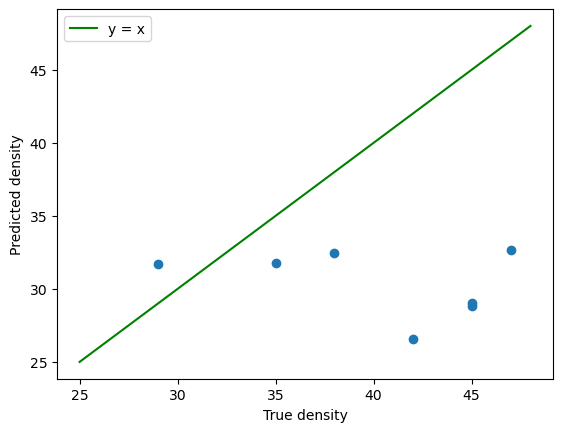

In [72]:
plt.scatter(block_0201_true_and_forecasted_values_df['True_count'], block_0201_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([25, 48], [25, 48], color='green', label='y = x')
plt.legend()
plt.show()

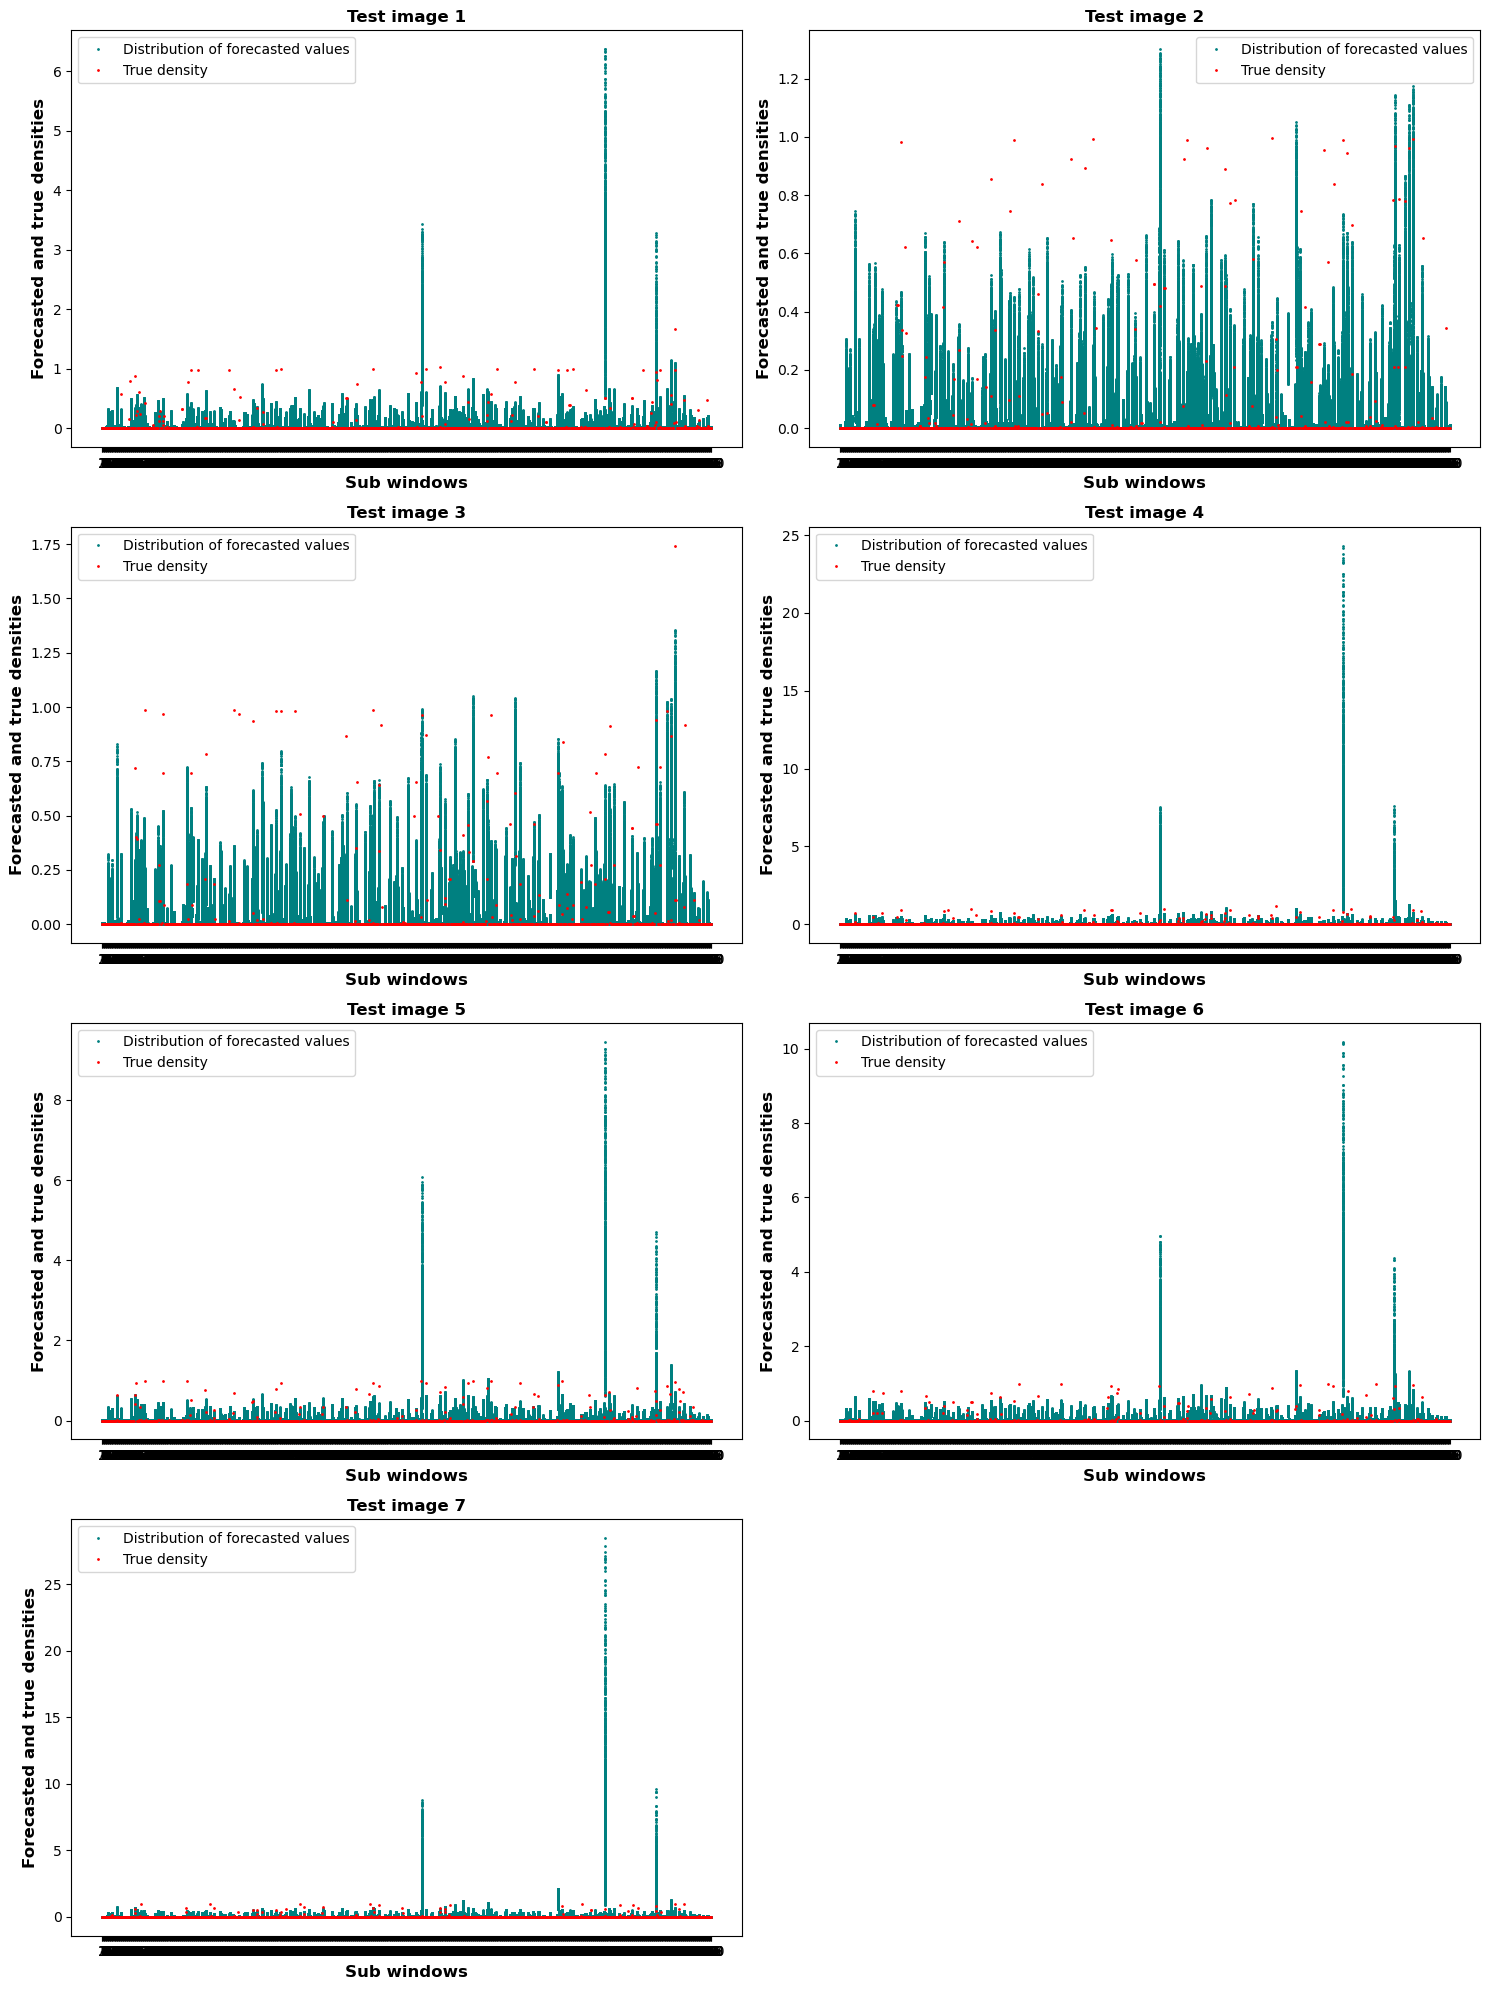

CPU times: user 26.2 s, sys: 706 ms, total: 26.9 s
Wall time: 26.6 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 